#**Fashion-MNIST**

1) Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

2) Each example is a 28x28 grayscale image, associated with a label from 10 classes.

3) Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

4) It shares the same image size and structure of training and testing splits.

In [1]:
#importing libraries
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#importing the keras libraries
import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [2]:
# READING THE MNIST DATASET
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#checking the shape of the data.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)



*   So, there are 60,000 Training Samples and 10,000 Test Samples.
*   Each example is a 28x28 grayscale image, associated with a label  from 10 classes.
*   Each example is a 28x28 grayscale image, associated with a label from 10 classes.
*  Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.
* This pixel-value is an integer between 0 and 255, inclusive.

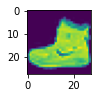

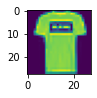

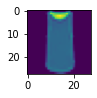

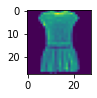

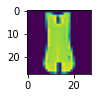

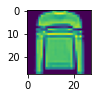

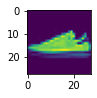

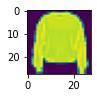

In [21]:
#Ploting the sample images.
for i in range(8):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
  plt.show() 

In [27]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Labels** :

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandals

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle Boots

In [38]:
np.isnan(x_train).sum()

0

In [39]:
np.isnan(x_test).sum()

0

In [40]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.
# DATASET CONTAINS VALUES BETWEEN 0-225.WE NORMALISING THE DATA BY DIVIDING WITH 225
x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.      


In [41]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
# RESHAPING THE DATA
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [42]:
from keras.utils import to_categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [43]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [45]:
# Building a ConvNet
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Convolution2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [46]:
#Compiling the Model
# We need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Refer to Keras doc for a comprehensive list of the optimizers available.

# Next we need to specify the loss function for the neural network which we want to minimize.

#For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)       

In [49]:
#Learning Rate Decay
#The Learning rate should be properly tuned , such that it is not too high to take very large steps,
   #neither it should be too small , which would not alter the Weights and Biases.
#We will use LearningRateScheduler here, which takes the step decay function as argument and return the 
#updated learning rates for use in optimzer at every epoch stage. Basically it outputs a new learning rate at every epoch stage.

from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [77]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(x_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(x_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [81]:
#fiting our model to the data
history = model.fit(train_generator,validation_data=test_generator,
          batch_size=64,
          epochs=20,
          verbose=1,
          callbacks=[reduce_lr])

Epoch 1/20
938/938 [==============================] - 19s 20ms/step - loss: 0.9004 - accuracy: 0.7019 - val_loss: 0.4353 - val_accuracy: 0.8455
Epoch 2/20
938/938 [==============================] - 19s 20ms/step - loss: 0.6131 - accuracy: 0.7767 - val_loss: 0.4114 - val_accuracy: 0.8568
Epoch 3/20
938/938 [==============================] - 19s 20ms/step - loss: 0.5582 - accuracy: 0.7983 - val_loss: 2.0410 - val_accuracy: 0.6023
Epoch 4/20
938/938 [==============================] - 19s 20ms/step - loss: 0.5217 - accuracy: 0.8122 - val_loss: 0.4023 - val_accuracy: 0.8572
Epoch 5/20
938/938 [==============================] - 19s 20ms/step - loss: 0.4882 - accuracy: 0.8232 - val_loss: 0.5590 - val_accuracy: 0.8148
Epoch 6/20
938/938 [==============================] - 19s 21ms/step - loss: 0.4676 - accuracy: 0.8312 - val_loss: 0.3279 - val_accuracy: 0.8804
Epoch 7/20
938/938 [==============================] - 19s 20ms/step - loss: 0.4523 - accuracy: 0.8382 - val_loss: 0.3385 - val_accuracy:

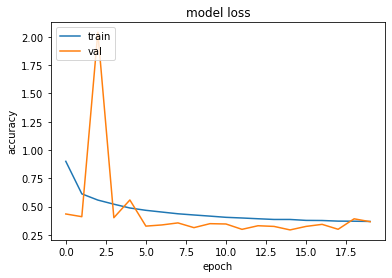

In [82]:
# PLOTING THE MODEL LOSS FOR NO OF EPOCH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

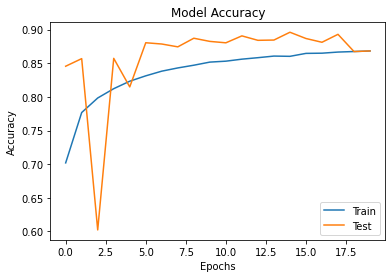

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [86]:
preds=model.predict(x_test)

In [87]:
from sklearn.metrics import classification_report,accuracy_score

y_preds = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

In [90]:
print(classification_report(y_pred=y_preds,y_true=y_true,target_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']))

              precision    recall  f1-score   support

 T-shirt/Top       0.85      0.56      0.68      1000
     Trouser       0.83      0.95      0.88      1000
    Pullover       0.64      0.66      0.65      1000
       Dress       0.98      0.18      0.30      1000
        Coat       0.46      0.90      0.61      1000
      Sandal       0.72      0.98      0.83      1000
       Shirt       0.52      0.12      0.20      1000
     Sneaker       1.00      0.35      0.52      1000
         Bag       0.64      0.98      0.77      1000
  Ankle Boot       0.63      0.95      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.73      0.66      0.62     10000
weighted avg       0.73      0.66      0.62     10000



(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9fe6682b70>)

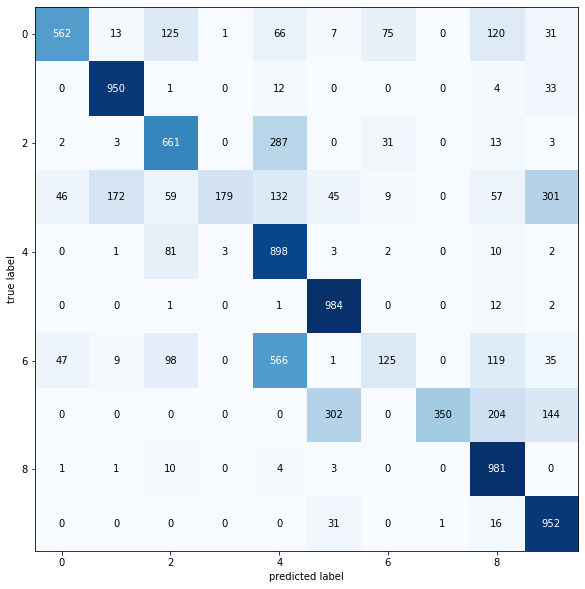

In [95]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_true,y_preds)
plot_confusion_matrix(mat,figsize=(10,10))